# AMAML

## General Imports
In this section, besides each machine learning model, every import used will be shown.

In [1]:
# General Imports
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from itertools import product
import warnings

# ML Imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, precision_score, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.exceptions import ConvergenceWarning

## Data Load
We will construct a *dataframe* called **df**. This *dataframe* will be used all along in the models.
It will be built from the file *data.csv*. The *data.csv* file is generated by *datagen.py*

In [2]:
df = pd.read_csv('data.csv')

## Data Preview

Let's check how the data is formatted after being loaded using some functions.

In [3]:
df.head()             # To check the beginning

,Name,Machine,AddressOfEntryPoint,SizeOfCode,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode.1,SizeOfInitializedData,SizeOfUninitializedData,...,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,DllCharacteristics,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,Malflag
0,7637ebd20f2b197995d6876d3cd4b01479614f5c0859bf...,34404,5328,9216,39,2,27,9216,25088,3072,...,4096,0,16,0,0,36864,49152,24576,30464,0
1,a9447372cc62144ca19196f8f18ffcb35f3907c10b8e4b...,34404,5328,13312,39,2,27,13312,31232,3072,...,4096,0,16,0,0,45056,61440,32768,37432,0
2,8bc53c486cba7fca5ffe4dd43976cbaac6bfb24acc95d2...,332,78862,73728,258,8,0,73728,16384,0,...,4096,0,16,34112,0,78780,81920,0,94208,0
3,ff6d6d846bb0ef538a95836a52e6187c855cbf93e2fce3...,34404,5328,32768,39,2,27,32768,62976,3072,...,4096,0,16,0,0,61440,86016,49152,79160,0
4,c2563bb38ff3a2f9109febfc012afa329401a15aea4a1a...,34404,43856,41472,34,12,10,41472,17408,0,...,4096,0,16,49504,0,56260,69632,65536,0,0


In [4]:
df.tail()            # To check the end

,Name,Machine,AddressOfEntryPoint,SizeOfCode,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode.1,SizeOfInitializedData,SizeOfUninitializedData,...,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,DllCharacteristics,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,Malflag
9927,b437e136a5a2e16fce380833475f84d912175149f7a0e2...,332,5248,145408,270,2,50,145408,46592,0,...,4096,0,16,0,0,191768,0,0,193024,1
9928,0b626ff78872af9976e86b331c860d9105ffd9f1509391...,332,55440,105984,258,10,0,105984,0,0,...,4096,0,16,0,190239,190383,196046,0,0,1
9929,69a35069b7951f06a9ca499db9a84f045433e1c7dc8a42...,332,77738,143360,8450,8,0,143360,61440,0,...,4096,0,16,320,179248,176652,204800,0,0,1
9930,b3c0aa1724caf5795d6248f20965cfdc6dca6a7ad1e07f...,332,110272,102912,270,2,50,102912,5632,0,...,4096,0,16,0,0,4224,114688,0,109056,1
9931,f3887457c3279fcec344da10411688b0b161b5fbc852a9...,332,77738,143360,8450,8,0,143360,61440,0,...,4096,0,16,320,178800,176204,204800,0,0,1


In [5]:
df.shape

(9932, 34)

## Data Preparation

In [6]:
df.drop(['Name', 'Machine'], axis=1, inplace=True)  # These two columns are obsolete in our study.

df = df.dropna(how='all')
display(df)

,AddressOfEntryPoint,SizeOfCode,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode.1,SizeOfInitializedData,SizeOfUninitializedData,BaseOfCode,ImageBase,...,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,DllCharacteristics,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,Malflag
0,5328,9216,39,2,27,9216,25088,3072,4096,4194304,...,4096,0,16,0,0,36864,49152,24576,30464,0
1,5328,13312,39,2,27,13312,31232,3072,4096,4194304,...,4096,0,16,0,0,45056,61440,32768,37432,0
2,78862,73728,258,8,0,73728,16384,0,8192,4194304,...,4096,0,16,34112,0,78780,81920,0,94208,0
3,5328,32768,39,2,27,32768,62976,3072,4096,4194304,...,4096,0,16,0,0,61440,86016,49152,79160,0
4,43856,41472,34,12,10,41472,17408,0,4096,5368709120,...,4096,0,16,49504,0,56260,69632,65536,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,5248,145408,270,2,50,145408,46592,0,4096,4194304,...,4096,0,16,0,0,191768,0,0,193024,1
9928,55440,105984,258,10,0,105984,0,0,4096,4194304,...,4096,0,16,0,190239,190383,196046,0,0,1
9929,77738,143360,8450,8,0,143360,61440,0,4096,1677721600,...,4096,0,16,320,179248,176652,204800,0,0,1
9930,110272,102912,270,2,50,102912,5632,0,8192,4194304,...,4096,0,16,0,0,4224,114688,0,109056,1


In [7]:
train, temp = train_test_split(df, test_size=0.3, random_state=42)
valid, test = train_test_split(temp, test_size=0.33, random_state=42)

print("Size of train:", train.shape)
print("Size of valid:", valid.shape)
print("Size of test :", test.shape)

Size of train: (6952, 32)
Size of valid: (1996, 32)
Size of test : (984, 32)


In [8]:
def data_preparator(dataframe, os=False, scaler=False):
    # We extract all the data and put it appart from the label.
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    # In case we want to scale it.
    if scaler:
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)

    # In case we want to over sample it.
    if os:
        smote = SMOTE(random_state=42)
        X, y = smote.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [9]:
OSS = False

if OSS == False:
    train, xT, yT = data_preparator(train, os=False, scaler=False)
    valid, xV, yV = data_preparator(valid, os=False, scaler=False)
    test, xTest, yTest = data_preparator(test, os=False, scaler=False)
    print("OSS [OVERSAMPLER & SCALER] Desactivated")
else:
    train, xT, yT = data_preparator(train, os=True, scaler=True)
    valid, xV, yV = data_preparator(valid, os=False, scaler=True)
    test, xTest, yTest = data_preparator(test, os=False, scaler=True)
    print("OSS [OVERSAMPLER & SCALER] Activated")


OSS [OVERSAMPLER & SCALER] Desactivated


In [10]:
sum(yT==1)

6303

In [11]:
sum(yT==0)

649

In [12]:
display(yT)

array([1, 1, 1, ..., 1, 0, 1])

## Models

In this section we are going to generate, train, validate and test the desired ML models.

### Model Dataframe

In [13]:
dfModelMetrics = pd.DataFrame(columns=['Model', 'Recall', 'Accuracy', 'F1-Score', 'Precision', 'Training Time', 'Predict Time'])

def updateModelMetrics(name, recall, accuracy, f1_score, precision, training_time, predict_time):
    global dfModelMetrics
    
    currentModel = {
        'Model' : name,
        'Recall' : recall,
        'Accuracy' : accuracy,
        'F1-Score' : f1_score,
        'Precision' : precision,
        'Training Time' : training_time,
        'Predict Time' : predict_time
    }

    dfModelMetrics.loc[len(df)] = currentModel

    dfModelMetrics = dfModelMetrics.reset_index(drop=True)

### Model Box

In [14]:
mBox = []
currentNumberToSave = 3

In [15]:
def BestRecallSaver(modelBox, numberToSave):
    global mBox
    # Selection based on their recall and top three
    modelBox.sort(key=lambda x: x[2], reverse=True)
    topModels = modelBox[:numberToSave]

    for model in topModels:
        mBox.append(model)

In [16]:
def modelBoxChecker():
    global mBox

    for model in mBox:
        print(f'{model[1]}: {model[2]}')

### kNN k-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knnBox = []

In [18]:
possible_neighbours = [ 3, 5, 7, 9, 11, int(math.sqrt(df.shape[0]))]

for n_neighbors in possible_neighbours:
    current_name = "knn" + str(n_neighbors) + "M"
    print(f'Training {current_name}...')
    current_model = KNeighborsClassifier(n_neighbors=n_neighbors)

    init = time.time()
    current_model.fit(xT, yT)
    end = time.time()

    fit_time = end - init

    init = time.time()
    y_pred = current_model.predict(xV)
    end = time.time()

    predict_time = end - init
    
    current_recall = recall_score(yV, y_pred)
    current_accuracy = accuracy_score(yV, y_pred)
    current_f1 = f1_score(yV, y_pred)
    current_precision = precision_score(yV, y_pred)

    updateModelMetrics(current_name, current_recall, current_accuracy, current_f1, current_precision, fit_time, predict_time)

    knnBox.append((current_model, current_name, current_recall))

Training knn3M...
Training knn5M...
Training knn7M...
Training knn9M...
Training knn11M...
Training knn99M...


In [19]:
BestRecallSaver(knnBox, currentNumberToSave)

In [20]:
modelBoxChecker()

knn7M: 0.9988738738738738
knn99M: 0.9988738738738738
knn9M: 0.9983108108108109


### SVM Support Vector Machines

In [21]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svmBox = []
svmLBox = []

In [22]:
# Grid of hyperparameters
gammas = [1, 50, 100]
c_penalties = [1, 50, 100]
degrees = [1, 3, 5]
kernels = ['rbf', 'sigmoid']

# Model training and saving
for gamma in gammas:
    for c in c_penalties:
        for degree in degrees:
            for kernel in kernels:
                current_name = "svc"+"_G-"+str(gamma)+"_C-"+str(c)+"_dg-"+str(degree)+"_kn-"+kernel
                print(f'Training {current_name}...')
                current_model = SVC(gamma=gamma, C=c, degree=degree, kernel=kernel)
                
                init = time.time()
                current_model.fit(xT, yT)
                end = time.time()
            
                fit_time = end - init
            
                init = time.time()
                y_pred = current_model.predict(xV)
                end = time.time()

                predict_time = end - init
                
                current_recall = recall_score(yV, y_pred)
                current_accuracy = accuracy_score(yV, y_pred)
                current_f1 = f1_score(yV, y_pred)
                current_precision = precision_score(yV, y_pred)
            
                updateModelMetrics(current_name, current_recall, current_accuracy, current_f1, current_precision, fit_time, predict_time)

                svmBox.append((current_model, current_name, current_recall))

Training svc_G-1_C-1_dg-1_kn-rbf...
Training svc_G-1_C-1_dg-1_kn-sigmoid...
Training svc_G-1_C-1_dg-3_kn-rbf...
Training svc_G-1_C-1_dg-3_kn-sigmoid...
Training svc_G-1_C-1_dg-5_kn-rbf...
Training svc_G-1_C-1_dg-5_kn-sigmoid...
Training svc_G-1_C-50_dg-1_kn-rbf...
Training svc_G-1_C-50_dg-1_kn-sigmoid...
Training svc_G-1_C-50_dg-3_kn-rbf...
Training svc_G-1_C-50_dg-3_kn-sigmoid...
Training svc_G-1_C-50_dg-5_kn-rbf...
Training svc_G-1_C-50_dg-5_kn-sigmoid...
Training svc_G-1_C-100_dg-1_kn-rbf...
Training svc_G-1_C-100_dg-1_kn-sigmoid...
Training svc_G-1_C-100_dg-3_kn-rbf...
Training svc_G-1_C-100_dg-3_kn-sigmoid...
Training svc_G-1_C-100_dg-5_kn-rbf...
Training svc_G-1_C-100_dg-5_kn-sigmoid...
Training svc_G-50_C-1_dg-1_kn-rbf...
Training svc_G-50_C-1_dg-1_kn-sigmoid...
Training svc_G-50_C-1_dg-3_kn-rbf...
Training svc_G-50_C-1_dg-3_kn-sigmoid...
Training svc_G-50_C-1_dg-5_kn-rbf...
Training svc_G-50_C-1_dg-5_kn-sigmoid...
Training svc_G-50_C-50_dg-1_kn-rbf...
Training svc_G-50_C-50_dg-

In [23]:
BestRecallSaver(svmBox, currentNumberToSave)

In [24]:
modelBoxChecker()

knn7M: 0.9988738738738738
knn99M: 0.9988738738738738
knn9M: 0.9983108108108109
svc_G-1_C-1_dg-1_kn-rbf: 1.0
svc_G-1_C-1_dg-1_kn-sigmoid: 1.0
svc_G-1_C-1_dg-3_kn-rbf: 1.0


In [25]:
fit_intercepts = [True, False]
intercept_scaling = [0.1, 0.5, 1, 5.0]
c_penalties = [0.1, 1, 10]

# Array to save the best models
best_models = []


for fi in fit_intercepts:
    for int_s in intercept_scaling:
        for c in c_penalties:
            current_name = "svcL"+"_INT_SCL-"+str(int_s)+"_C-"+str(c)
            if (fi):
                current_name += ":FI-1:"
            else:
                current_name += ":FI-0:"

            print(f'Training {current_name}')
                
            current_model = LinearSVC(penalty='l2', C=c, loss='squared_hinge', fit_intercept=fi, intercept_scaling=int_s, dual='auto', max_iter=10000, tol=1e-5)
            try:
                with warnings.catch_warnings():
                    warnings.filterwarnings('error', category=ConvergenceWarning)
                    
                    init = time.time()
                    current_model.fit(xT, yT)
                    end = time.time()

                    fit_time = end - init
            except ConvergenceWarning:
                print(f"ConvergenceWarning /!\: Model {current_name} failed to converge.")
                continue
            
            init = time.time()
            y_pred = current_model.predict(xV)
            end = time.time()

            predict_time = end - init
            
            current_recall = recall_score(yV, y_pred)
            current_accuracy = accuracy_score(yV, y_pred)
            current_f1 = f1_score(yV, y_pred)
            current_precision = precision_score(yV, y_pred)
        
            updateModelMetrics(current_name, current_recall, current_accuracy, current_f1, current_precision, fit_time, predict_time)

            svmLBox.append((current_model, current_name, current_recall))

Training svcL_INT_SCL-0.1_C-0.1:FI-1:
Training svcL_INT_SCL-0.1_C-1:FI-1:
Training svcL_INT_SCL-0.1_C-10:FI-1:
Training svcL_INT_SCL-0.5_C-0.1:FI-1:
Training svcL_INT_SCL-0.5_C-1:FI-1:
Training svcL_INT_SCL-0.5_C-10:FI-1:
Training svcL_INT_SCL-1_C-0.1:FI-1:
Training svcL_INT_SCL-1_C-1:FI-1:
Training svcL_INT_SCL-1_C-10:FI-1:
Training svcL_INT_SCL-5.0_C-0.1:FI-1:
Training svcL_INT_SCL-5.0_C-1:FI-1:
Training svcL_INT_SCL-5.0_C-10:FI-1:
Training svcL_INT_SCL-0.1_C-0.1:FI-0:
Training svcL_INT_SCL-0.1_C-1:FI-0:
Training svcL_INT_SCL-0.1_C-10:FI-0:
Training svcL_INT_SCL-0.5_C-0.1:FI-0:
Training svcL_INT_SCL-0.5_C-1:FI-0:
Training svcL_INT_SCL-0.5_C-10:FI-0:
Training svcL_INT_SCL-1_C-0.1:FI-0:
Training svcL_INT_SCL-1_C-1:FI-0:
Training svcL_INT_SCL-1_C-10:FI-0:
Training svcL_INT_SCL-5.0_C-0.1:FI-0:
Training svcL_INT_SCL-5.0_C-1:FI-0:
Training svcL_INT_SCL-5.0_C-10:FI-0:


In [26]:
BestRecallSaver(svmLBox, currentNumberToSave)

In [27]:
modelBoxChecker()

knn7M: 0.9988738738738738
knn99M: 0.9988738738738738
knn9M: 0.9983108108108109
svc_G-1_C-1_dg-1_kn-rbf: 1.0
svc_G-1_C-1_dg-1_kn-sigmoid: 1.0
svc_G-1_C-1_dg-3_kn-rbf: 1.0
svcL_INT_SCL-0.1_C-0.1:FI-1:: 0.9943693693693694
svcL_INT_SCL-0.1_C-10:FI-1:: 0.9943693693693694
svcL_INT_SCL-0.5_C-0.1:FI-1:: 0.9943693693693694


### RF Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfBox = []

In [29]:
current_name = "rfOOB"
current_model = RandomForestClassifier()
print(f'Training {current_name}...')


init = time.time()
current_model.fit(xT, yT)
end = time.time()

fit_time = end - init

init = time.time()
y_pred = current_model.predict(xV)
end = time.time()

predict_time = end - init

current_recall = recall_score(yV, y_pred)
current_accuracy = accuracy_score(yV, y_pred)
current_f1 = f1_score(yV, y_pred)
current_precision = precision_score(yV, y_pred)

report = classification_report(yV, y_pred)
print(report)

updateModelMetrics(current_name, current_recall, current_accuracy, current_f1, current_precision, fit_time, predict_time)

rfBox.append((current_model, current_name, current_recall))

Training rfOOB...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       220
           1       1.00      1.00      1.00      1776

    accuracy                           1.00      1996
   macro avg       0.99      0.99      0.99      1996
weighted avg       1.00      1.00      1.00      1996



In [30]:
stimators = [100, 1000, 5000]
criterions = ["gini", "entropy", "log_loss"]
class_weights = [None, 'balanced', 'balanced_subsample']

for stimator in stimators:
    for criterion in criterions:
            for class_weight in class_weights:
                current_name = "rf"+"_STM-"+str(stimator)+"_CRT-"+str(criterion)+"_CW-"+str(class_weight)
                print(f'Training {current_name}...')
                current_model = RandomForestClassifier(n_estimators=stimator, criterion=criterion, class_weight=class_weight)

                
                init = time.time()
                current_model.fit(xT, yT)
                end = time.time()
            
                fit_time = end - init
            
                init = time.time()
                y_pred = current_model.predict(xV)
                end = time.time()

                predict_time = end - init
                
                current_recall = recall_score(yV, y_pred)
                current_accuracy = accuracy_score(yV, y_pred)
                current_f1 = f1_score(yV, y_pred)
                current_precision = precision_score(yV, y_pred)
            
                updateModelMetrics(current_name, current_recall, current_accuracy, current_f1, current_precision, fit_time, predict_time)

                rfBox.append((current_model, current_name, current_recall))

Training rf_STM-100_CRT-gini_CW-None...
Training rf_STM-100_CRT-gini_CW-balanced...
Training rf_STM-100_CRT-gini_CW-balanced_subsample...
Training rf_STM-100_CRT-entropy_CW-None...
Training rf_STM-100_CRT-entropy_CW-balanced...
Training rf_STM-100_CRT-entropy_CW-balanced_subsample...
Training rf_STM-100_CRT-log_loss_CW-None...
Training rf_STM-100_CRT-log_loss_CW-balanced...
Training rf_STM-100_CRT-log_loss_CW-balanced_subsample...
Training rf_STM-1000_CRT-gini_CW-None...
Training rf_STM-1000_CRT-gini_CW-balanced...
Training rf_STM-1000_CRT-gini_CW-balanced_subsample...
Training rf_STM-1000_CRT-entropy_CW-None...
Training rf_STM-1000_CRT-entropy_CW-balanced...
Training rf_STM-1000_CRT-entropy_CW-balanced_subsample...
Training rf_STM-1000_CRT-log_loss_CW-None...
Training rf_STM-1000_CRT-log_loss_CW-balanced...
Training rf_STM-1000_CRT-log_loss_CW-balanced_subsample...
Training rf_STM-5000_CRT-gini_CW-None...
Training rf_STM-5000_CRT-gini_CW-balanced...
Training rf_STM-5000_CRT-gini_CW-ba

In [31]:
BestRecallSaver(rfBox, currentNumberToSave)

In [32]:
modelBoxChecker()

knn7M: 0.9988738738738738
knn99M: 0.9988738738738738
knn9M: 0.9983108108108109
svc_G-1_C-1_dg-1_kn-rbf: 1.0
svc_G-1_C-1_dg-1_kn-sigmoid: 1.0
svc_G-1_C-1_dg-3_kn-rbf: 1.0
svcL_INT_SCL-0.1_C-0.1:FI-1:: 0.9943693693693694
svcL_INT_SCL-0.1_C-10:FI-1:: 0.9943693693693694
svcL_INT_SCL-0.5_C-0.1:FI-1:: 0.9943693693693694
rf_STM-100_CRT-gini_CW-None: 0.9994369369369369
rf_STM-100_CRT-gini_CW-balanced_subsample: 0.9994369369369369
rf_STM-100_CRT-entropy_CW-balanced: 0.9994369369369369


In [33]:
print(dfModelMetrics)

                                              Model    Recall  Accuracy  \
0                                             knn3M  0.996059  0.991984   
1                                             knn5M  0.997748  0.992485   
2                                             knn7M  0.998874  0.990982   
3                                             knn9M  0.998311  0.988978   
4                                            knn11M  0.997748  0.986974   
..                                              ...       ...       ...   
107             rf_STM-5000_CRT-entropy_CW-balanced  0.999437  0.996994   
108   rf_STM-5000_CRT-entropy_CW-balanced_subsample  0.999437  0.996994   
109                rf_STM-5000_CRT-log_loss_CW-None  0.999437  0.997495   
110            rf_STM-5000_CRT-log_loss_CW-balanced  0.999437  0.996493   
111  rf_STM-5000_CRT-log_loss_CW-balanced_subsample  0.999437  0.996994   

     F1-Score  Precision  Training Time  Predict Time  
0    0.995498   0.994938       0.003557    

## DT Decision Tree

In [34]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtBox = [ ]

In [35]:
current_name = "dtOOB"
current_model = DecisionTreeClassifier()
print(f'Training {current_name}...')


init = time.time()
current_model.fit(xT, yT)
end = time.time()

fit_time = end - init

init = time.time()
y_pred = current_model.predict(xV)
end = time.time()

predict_time = end - init

current_recall = recall_score(yV, y_pred)
current_accuracy = accuracy_score(yV, y_pred)
current_f1 = f1_score(yV, y_pred)
current_precision = precision_score(yV, y_pred)

report = classification_report(yV, y_pred)
print(report)

updateModelMetrics(current_name, current_recall, current_accuracy, current_f1, current_precision, fit_time, predict_time)

dtBox.append((current_model, current_name, current_recall))

Training dtOOB...
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       220
           1       1.00      1.00      1.00      1776

    accuracy                           1.00      1996
   macro avg       0.99      0.99      0.99      1996
weighted avg       1.00      1.00      1.00      1996



In [36]:
criterions = ["gini", "entropy", "log_loss"]
splitters = ["best", "random"]
max_features = ['sqrt', "log2", 0.3, 0.6, 0.9]

for criterion in criterions:
    for splitter in splitters:
            for max_feature in max_features:
                current_name = "dt"+"_CRT-"+criterion+"_SPLT-"+splitter+"_CW-"+str(max_feature)
                print(f'Training {current_name}...')
                current_model = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_features=max_feature)

                
                init = time.time()
                current_model.fit(xT, yT)
                end = time.time()
            
                fit_time = end - init
            
                init = time.time()
                y_pred = current_model.predict(xV)
                end = time.time()

                predict_time = end - init
                
                current_recall = recall_score(yV, y_pred)
                current_accuracy = accuracy_score(yV, y_pred)
                current_f1 = f1_score(yV, y_pred)
                current_precision = precision_score(yV, y_pred)
            
                updateModelMetrics(current_name, current_recall, current_accuracy, current_f1, current_precision, fit_time, predict_time)

                dtBox.append((current_model, current_name, current_recall))

Training dt_CRT-gini_SPLT-best_CW-sqrt...
Training dt_CRT-gini_SPLT-best_CW-log2...
Training dt_CRT-gini_SPLT-best_CW-0.3...
Training dt_CRT-gini_SPLT-best_CW-0.6...
Training dt_CRT-gini_SPLT-best_CW-0.9...
Training dt_CRT-gini_SPLT-random_CW-sqrt...
Training dt_CRT-gini_SPLT-random_CW-log2...
Training dt_CRT-gini_SPLT-random_CW-0.3...
Training dt_CRT-gini_SPLT-random_CW-0.6...
Training dt_CRT-gini_SPLT-random_CW-0.9...
Training dt_CRT-entropy_SPLT-best_CW-sqrt...
Training dt_CRT-entropy_SPLT-best_CW-log2...
Training dt_CRT-entropy_SPLT-best_CW-0.3...
Training dt_CRT-entropy_SPLT-best_CW-0.6...
Training dt_CRT-entropy_SPLT-best_CW-0.9...
Training dt_CRT-entropy_SPLT-random_CW-sqrt...
Training dt_CRT-entropy_SPLT-random_CW-log2...
Training dt_CRT-entropy_SPLT-random_CW-0.3...
Training dt_CRT-entropy_SPLT-random_CW-0.6...
Training dt_CRT-entropy_SPLT-random_CW-0.9...
Training dt_CRT-log_loss_SPLT-best_CW-sqrt...
Training dt_CRT-log_loss_SPLT-best_CW-log2...
Training dt_CRT-log_loss_SPLT-

In [37]:
BestRecallSaver(dtBox, currentNumberToSave)

In [38]:
modelBoxChecker()

knn7M: 0.9988738738738738
knn99M: 0.9988738738738738
knn9M: 0.9983108108108109
svc_G-1_C-1_dg-1_kn-rbf: 1.0
svc_G-1_C-1_dg-1_kn-sigmoid: 1.0
svc_G-1_C-1_dg-3_kn-rbf: 1.0
svcL_INT_SCL-0.1_C-0.1:FI-1:: 0.9943693693693694
svcL_INT_SCL-0.1_C-10:FI-1:: 0.9943693693693694
svcL_INT_SCL-0.5_C-0.1:FI-1:: 0.9943693693693694
rf_STM-100_CRT-gini_CW-None: 0.9994369369369369
rf_STM-100_CRT-gini_CW-balanced_subsample: 0.9994369369369369
rf_STM-100_CRT-entropy_CW-balanced: 0.9994369369369369
dt_CRT-log_loss_SPLT-best_CW-sqrt: 0.9988738738738738
dt_CRT-log_loss_SPLT-best_CW-0.3: 0.9988738738738738
dt_CRT-entropy_SPLT-best_CW-0.3: 0.9983108108108109


## NN Neural Network

In [39]:
import tensorflow as tf

2024-05-27 16:46:02.680329: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 16:46:02.874670: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 16:46:03.749181: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 16:46:07.250545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [40]:
def nnCreator(xT, yT, bSize, epochs, nNodes, doProb, lRate):
    scaler = StandardScaler()
    xT = scaler.fit_transform(xT)
    
    nnM = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(xT.shape[1],)),
        tf.keras.layers.Dense(nNodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(doProb),
        tf.keras.layers.Dense(nNodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(doProb),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])


    nnM.compile(optimizer=tf.keras.optimizers.Adam(lRate), loss='binary_crossentropy',
                metrics=[tf.keras.metrics.Recall(name="recall"),tf.keras.metrics.Accuracy(name="accuracy"),
                         tf.keras.metrics.Precision(name="precision")])
    

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    init = time.time()
    history = nnM.fit(
        xT, yT, epochs=epochs, batch_size=bSize, validation_split=0.2, verbose=0,
        callbacks=[early_stopping, lr_scheduler]
    )
    end = time.time()

    fit_time = end - init

    recall = history.history.get('recall', [])[-1]

    return history, nnM, fit_time, recall

In [41]:
bSizes = [64, 128, 256]
nNodes = [32, 64, 128]
doProbs = [0.1, 0.3]

# bSizes = [64]
# nNodes = [32]
# doProbs = [0.1, 0.3]

NNBox = [ ]

for bSize in bSizes:
    for nNode in nNodes:
        for doProb in doProbs:
            current_name = "nn"+"_BS-"+str(bSize)+"_NN-"+str(nNode)+"_DOP-"+str(doProb)
            print(f'Training {current_name}')
            history, nnM, fit_time, recall = nnCreator(xT, yT, bSize, 100, nNode, doProb, 0.001)

            NNBox.append((current_name, (history, nnM, fit_time, recall)))            

Training nn_BS-64_NN-32_DOP-0.1
Training nn_BS-64_NN-32_DOP-0.3
Training nn_BS-64_NN-64_DOP-0.1
Training nn_BS-64_NN-64_DOP-0.3
Training nn_BS-64_NN-128_DOP-0.1
Training nn_BS-64_NN-128_DOP-0.3
Training nn_BS-128_NN-32_DOP-0.1
Training nn_BS-128_NN-32_DOP-0.3
Training nn_BS-128_NN-64_DOP-0.1
Training nn_BS-128_NN-64_DOP-0.3
Training nn_BS-128_NN-128_DOP-0.1
Training nn_BS-128_NN-128_DOP-0.3
Training nn_BS-256_NN-32_DOP-0.1
Training nn_BS-256_NN-32_DOP-0.3
Training nn_BS-256_NN-64_DOP-0.1
Training nn_BS-256_NN-64_DOP-0.3
Training nn_BS-256_NN-128_DOP-0.1
Training nn_BS-256_NN-128_DOP-0.3


In [42]:
for current_name, info in NNBox:
    init = time.time()
    y_pred = info[1].predict(xV)
    end = time.time()

    predict_time = end - init

    accuracy_values = info[0].history.get("accuracy", [])
    precision_values = info[0].history.get("precision", [])
    
    
    current_recall = info[3]
    current_accuracy = accuracy_values[-1]
    current_precision = precision_values[-1]
    current_f1 = 2 * (current_precision * current_recall) / (current_precision + current_recall + np.finfo(float).eps)
    fit_time = info[2]

    updateModelMetrics(current_name, current_recall, current_accuracy, current_f1, current_precision, fit_time, predict_time)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [43]:
NNBox.sort(key=lambda x: x[1][3], reverse=True)
topNN = NNBox[:currentNumberToSave]

In [44]:
modelBoxChecker()

knn7M: 0.9988738738738738
knn99M: 0.9988738738738738
knn9M: 0.9983108108108109
svc_G-1_C-1_dg-1_kn-rbf: 1.0
svc_G-1_C-1_dg-1_kn-sigmoid: 1.0
svc_G-1_C-1_dg-3_kn-rbf: 1.0
svcL_INT_SCL-0.1_C-0.1:FI-1:: 0.9943693693693694
svcL_INT_SCL-0.1_C-10:FI-1:: 0.9943693693693694
svcL_INT_SCL-0.5_C-0.1:FI-1:: 0.9943693693693694
rf_STM-100_CRT-gini_CW-None: 0.9994369369369369
rf_STM-100_CRT-gini_CW-balanced_subsample: 0.9994369369369369
rf_STM-100_CRT-entropy_CW-balanced: 0.9994369369369369
dt_CRT-log_loss_SPLT-best_CW-sqrt: 0.9988738738738738
dt_CRT-log_loss_SPLT-best_CW-0.3: 0.9988738738738738
dt_CRT-entropy_SPLT-best_CW-0.3: 0.9983108108108109


## K-Fold Validation

In [45]:
dfValidationModelMetrics = pd.DataFrame(columns=['Model', 'Validation Recall', 'Standard Deviation'])
kf = KFold(n_splits=5, shuffle=True, random_state=33)

for m, name, current_recall in mBox:
    validation_score = cross_val_score(m, xV, yV, cv=kf, scoring='recall')
    # print(f'{name} model. Recall: {validation_score.mean()}. Standard Deviation: {validation_score.std()}.')

    global dfValidationModelMetrics
    
    currentModel = {
        'Model' : name,
        'Validation Recall': validation_score.mean(),
        'Standard Deviation': validation_score.std()
    }

    dfValidationModelMetrics.loc[len(df)] = currentModel

    dfValidationModelMetrics = dfValidationModelMetrics.reset_index(drop=True)


for name, info in topNN:
    global dfValidationModelMetrics

    validation_scores = info[0].history.get('val_recall',[])
    
    currentModel = {
        'Model' : name,
        'Validation Recall': np.mean(validation_scores),
        'Standard Deviation': np.std(validation_scores)
    }
    

    dfValidationModelMetrics.loc[len(df)] = currentModel

    dfValidationModelMetrics = dfValidationModelMetrics.reset_index(drop=True)
             

In [46]:
print(dfValidationModelMetrics)

                                        Model  Validation Recall  \
0                                       knn7M           0.996071   
1                                      knn99M           0.998870   
2                                       knn9M           0.994943   
3                     svc_G-1_C-1_dg-1_kn-rbf           1.000000   
4                 svc_G-1_C-1_dg-1_kn-sigmoid           1.000000   
5                     svc_G-1_C-1_dg-3_kn-rbf           1.000000   
6                svcL_INT_SCL-0.1_C-0.1:FI-1:           0.992144   
7                 svcL_INT_SCL-0.1_C-10:FI-1:           0.992144   
8                svcL_INT_SCL-0.5_C-0.1:FI-1:           0.992144   
9                 rf_STM-100_CRT-gini_CW-None           0.996050   
10  rf_STM-100_CRT-gini_CW-balanced_subsample           0.996628   
11         rf_STM-100_CRT-entropy_CW-balanced           0.998327   
12          dt_CRT-log_loss_SPLT-best_CW-sqrt           0.992660   
13           dt_CRT-log_loss_SPLT-best_CW-0.3   

## Generation of .pkl

In [47]:
import joblib

In [48]:
output_dir = "./models"
os.makedirs(output_dir, exist_ok=True)

for current_model, current_name, accuracy in mBox:
    filename = os.path.join(output_dir, f"{current_name}.pkl")
    try:
        joblib.dump(current_model, filename)  # Asegúrate de usar current_model aquí
        print(f"Modelo {current_name} guardado como {filename}")
    except Exception as e:
        print(f"No se pudo guardar el modelo {current_name}: {e}")

Modelo knn7M guardado como ./models/knn7M.pkl
Modelo knn99M guardado como ./models/knn99M.pkl
Modelo knn9M guardado como ./models/knn9M.pkl
Modelo svc_G-1_C-1_dg-1_kn-rbf guardado como ./models/svc_G-1_C-1_dg-1_kn-rbf.pkl
Modelo svc_G-1_C-1_dg-1_kn-sigmoid guardado como ./models/svc_G-1_C-1_dg-1_kn-sigmoid.pkl
Modelo svc_G-1_C-1_dg-3_kn-rbf guardado como ./models/svc_G-1_C-1_dg-3_kn-rbf.pkl
Modelo svcL_INT_SCL-0.1_C-0.1:FI-1: guardado como ./models/svcL_INT_SCL-0.1_C-0.1:FI-1:.pkl
Modelo svcL_INT_SCL-0.1_C-10:FI-1: guardado como ./models/svcL_INT_SCL-0.1_C-10:FI-1:.pkl
Modelo svcL_INT_SCL-0.5_C-0.1:FI-1: guardado como ./models/svcL_INT_SCL-0.5_C-0.1:FI-1:.pkl
Modelo rf_STM-100_CRT-gini_CW-None guardado como ./models/rf_STM-100_CRT-gini_CW-None.pkl
Modelo rf_STM-100_CRT-gini_CW-balanced_subsample guardado como ./models/rf_STM-100_CRT-gini_CW-balanced_subsample.pkl
Modelo rf_STM-100_CRT-entropy_CW-balanced guardado como ./models/rf_STM-100_CRT-entropy_CW-balanced.pkl
Modelo dt_CRT-log_lo

In [49]:
for current_name, info in topNN:
    filename = os.path.join(output_dir, f"{current_name}.keras")
    info[1].save(filename)

## Explainability and graphics

In [118]:
import shap
import lime
import interpret
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
dfModelMetrics.to_csv('AllModelMetrics.csv', index=False)

<Figure size 640x480 with 0 Axes>

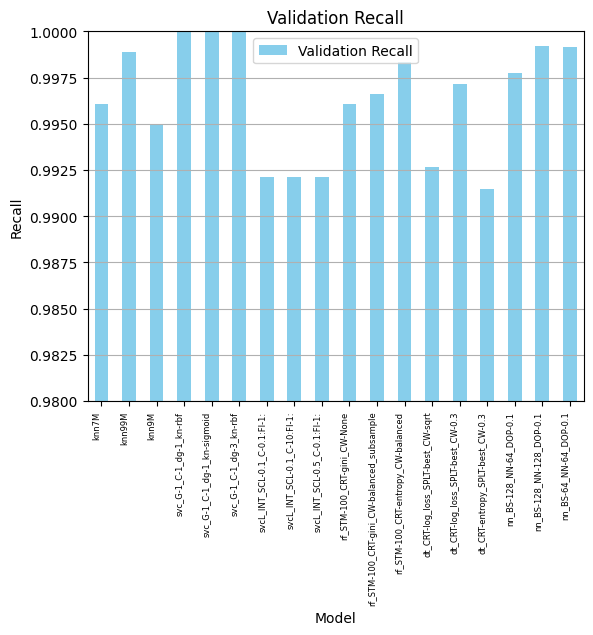

In [99]:
import matplotlib.pyplot as plt

# Leer el archivo CSV
dfStatisticsModels = dfValidationModelMetrics

# Crear gráfico de barras para Recall
plt.figure()
dfStatisticsModels.plot(kind='bar', x='Model', y='Validation Recall', color='skyblue')
plt.title('Validation Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(fontsize=6, ha="right")
plt.grid(axis='y')
plt.ylim(0.98, 1)  # Ajustar el rango del eje y entre 0.9 y 1
plt.show()

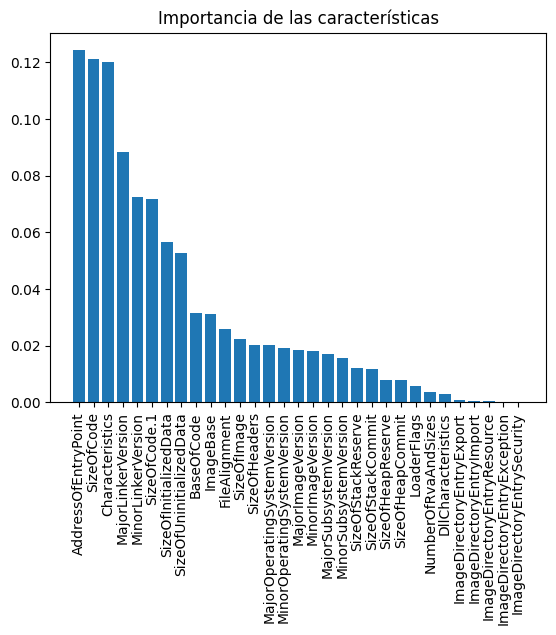

In [104]:
importances = rfBox[0][0].feature_importances_
features = df.columns[:-1]

indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Caracteristics importance")
plt.bar(range(xT.shape[1]), importances[indices], align="center")
plt.xticks(range(xT.shape[1]), features, rotation=90)
plt.show()

In [193]:
importances_tree = []
importances_coef = []
importances_perm = []

for model, name, rc in mBox:
    
    if hasattr(model, 'feature_importances_'):
        importance_tree = model.feature_importances_
        print(f'{name}')
        
        importances_tree.append(pd.DataFrame({
            'feature': features,
            'importance': importance_tree,
            'model': name
        }))
    elif hasattr(model, 'coef_'):
        importance_coef = np.abs(model.coef_[0])
        print(f'{name}')
        
        importances_coef.append(pd.DataFrame({
            'feature': features,
            'importance': importance_coef,
            'model': name
        }))
    else:
        result = permutation_importance(model, xTest, yTest, n_repeats=3, random_state=42, n_jobs=-1)
        importance_perm = result.importances_mean

        importances_perm.append(pd.DataFrame({
            'feature': features,
            'importance': importance_perm,
            'model': name
        }))
        print(f'{name}')


importances_tree = pd.concat(importances_tree, ignore_index=True)
importances_coef = pd.concat(importances_coef, ignore_index=True)
importances_perm = pd.concat(importances_perm, ignore_index=True)

knn7M
knn99M
knn9M
svc_G-1_C-1_dg-1_kn-rbf
svc_G-1_C-1_dg-1_kn-sigmoid
svc_G-1_C-1_dg-3_kn-rbf
svcL_INT_SCL-0.1_C-0.1:FI-1:
svcL_INT_SCL-0.1_C-10:FI-1:
svcL_INT_SCL-0.5_C-0.1:FI-1:
rf_STM-100_CRT-gini_CW-None
rf_STM-100_CRT-gini_CW-balanced_subsample
rf_STM-100_CRT-entropy_CW-balanced
dt_CRT-log_loss_SPLT-best_CW-sqrt
dt_CRT-log_loss_SPLT-best_CW-0.3
dt_CRT-entropy_SPLT-best_CW-0.3


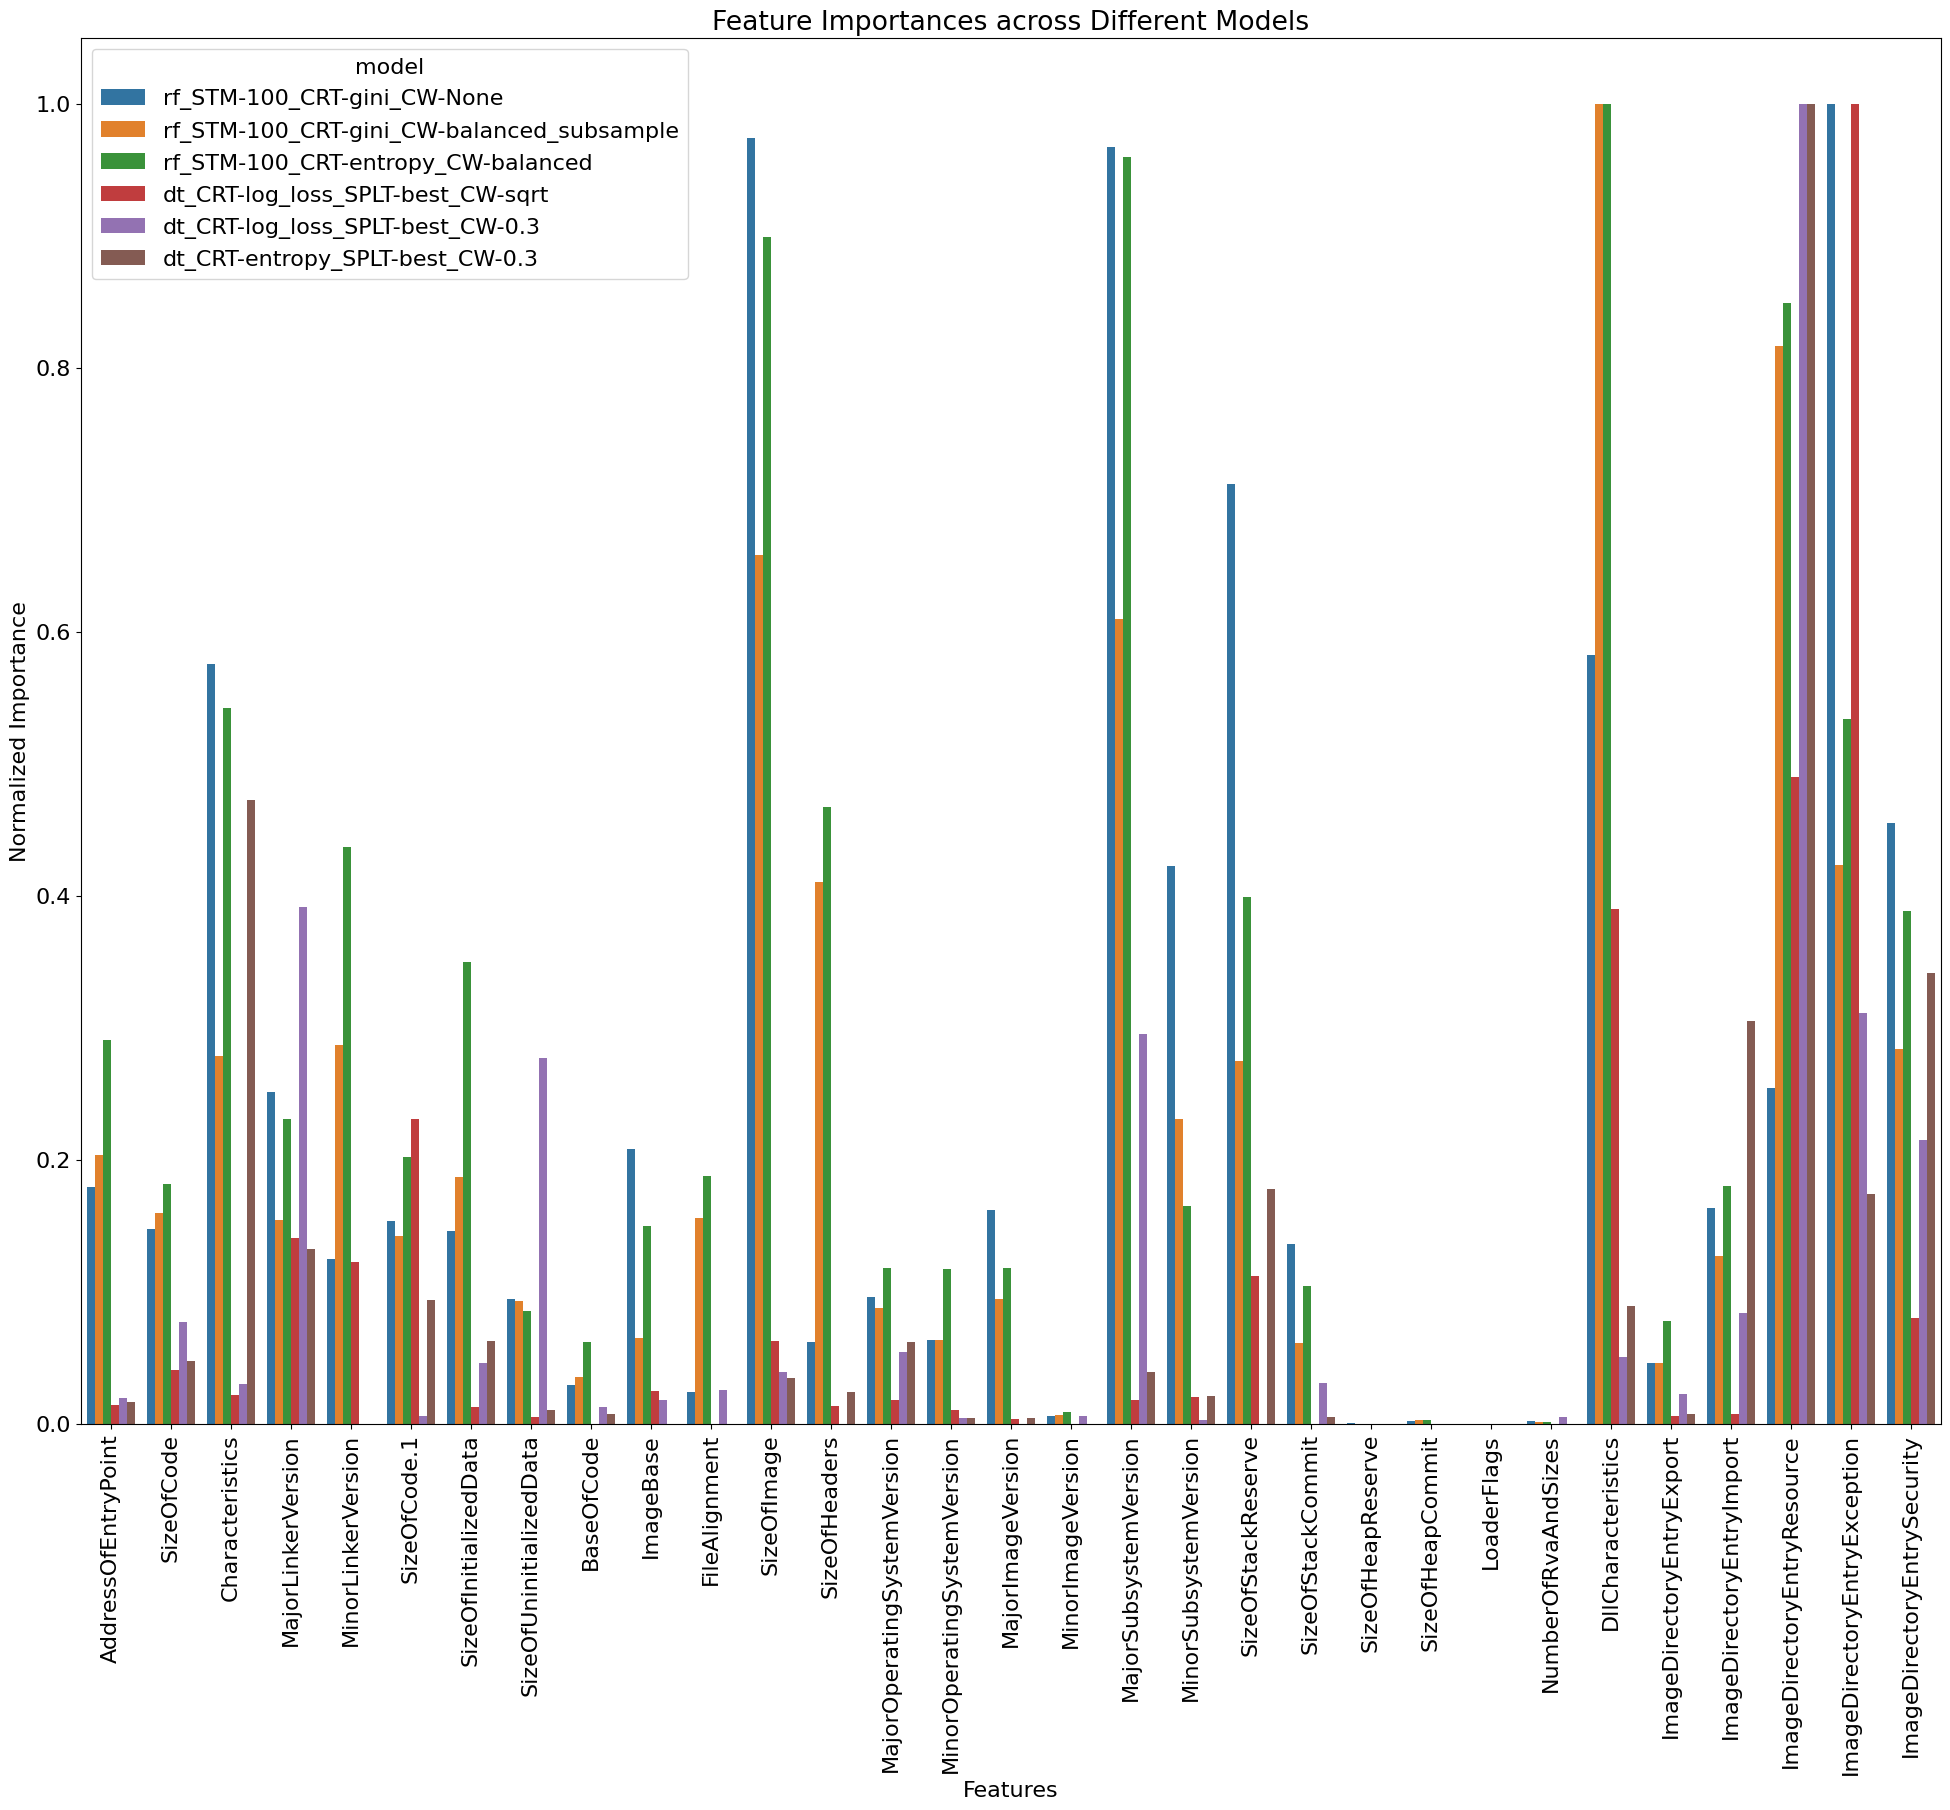

<Figure size 640x480 with 0 Axes>

In [194]:
importances_tree['normalized_importance'] = importances_tree.groupby('model')['importance'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.rc("font", size=16)

plt.figure(figsize=(24, 18))
sns.barplot(data=importances_tree, x='feature', y='normalized_importance', hue='model')
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.xticks(rotation=90, fontsize=16)
plt.title('Feature Importances across Different Models')
plt.show()
plt.tight_layout()

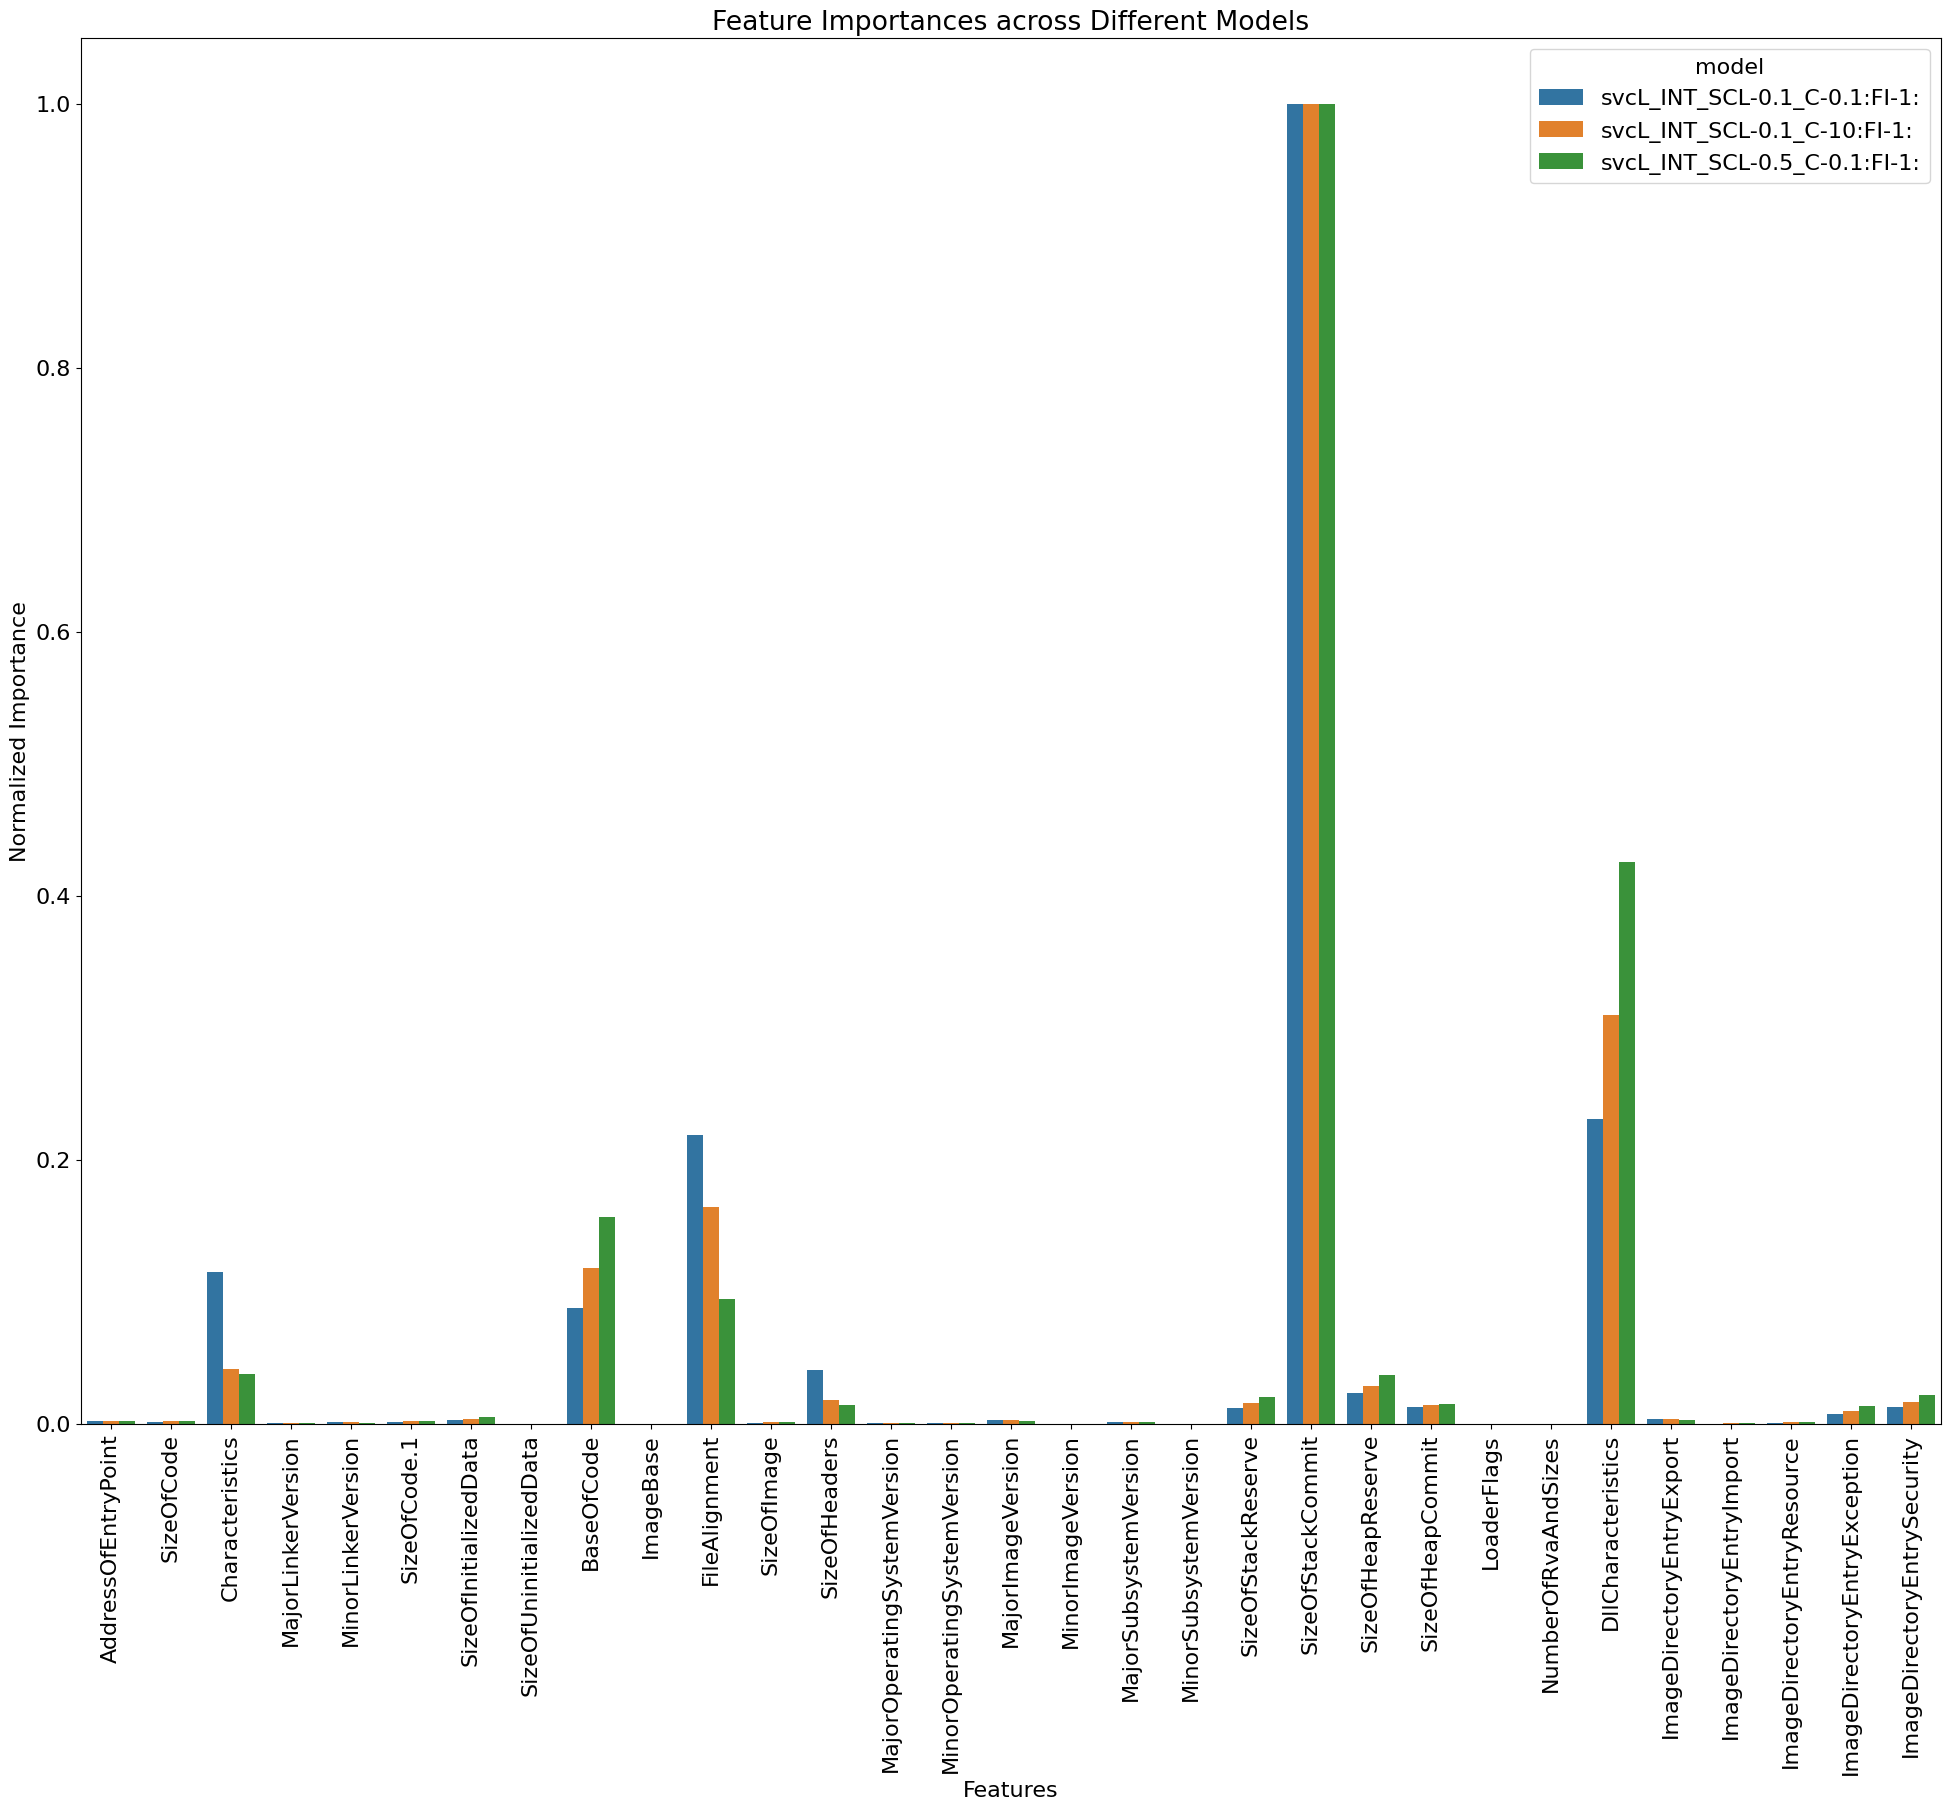

<Figure size 640x480 with 0 Axes>

In [195]:
importances_coef['normalized_coef'] = importances_coef.groupby('model')['importance'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.rc("font", size=16)

plt.figure(figsize=(24, 18))
sns.barplot(data=importances_coef, x='feature', y='normalized_coef', hue='model')
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.xticks(rotation=90, fontsize=16)
plt.title('Feature Importances across Different Models')
plt.show()
plt.tight_layout()

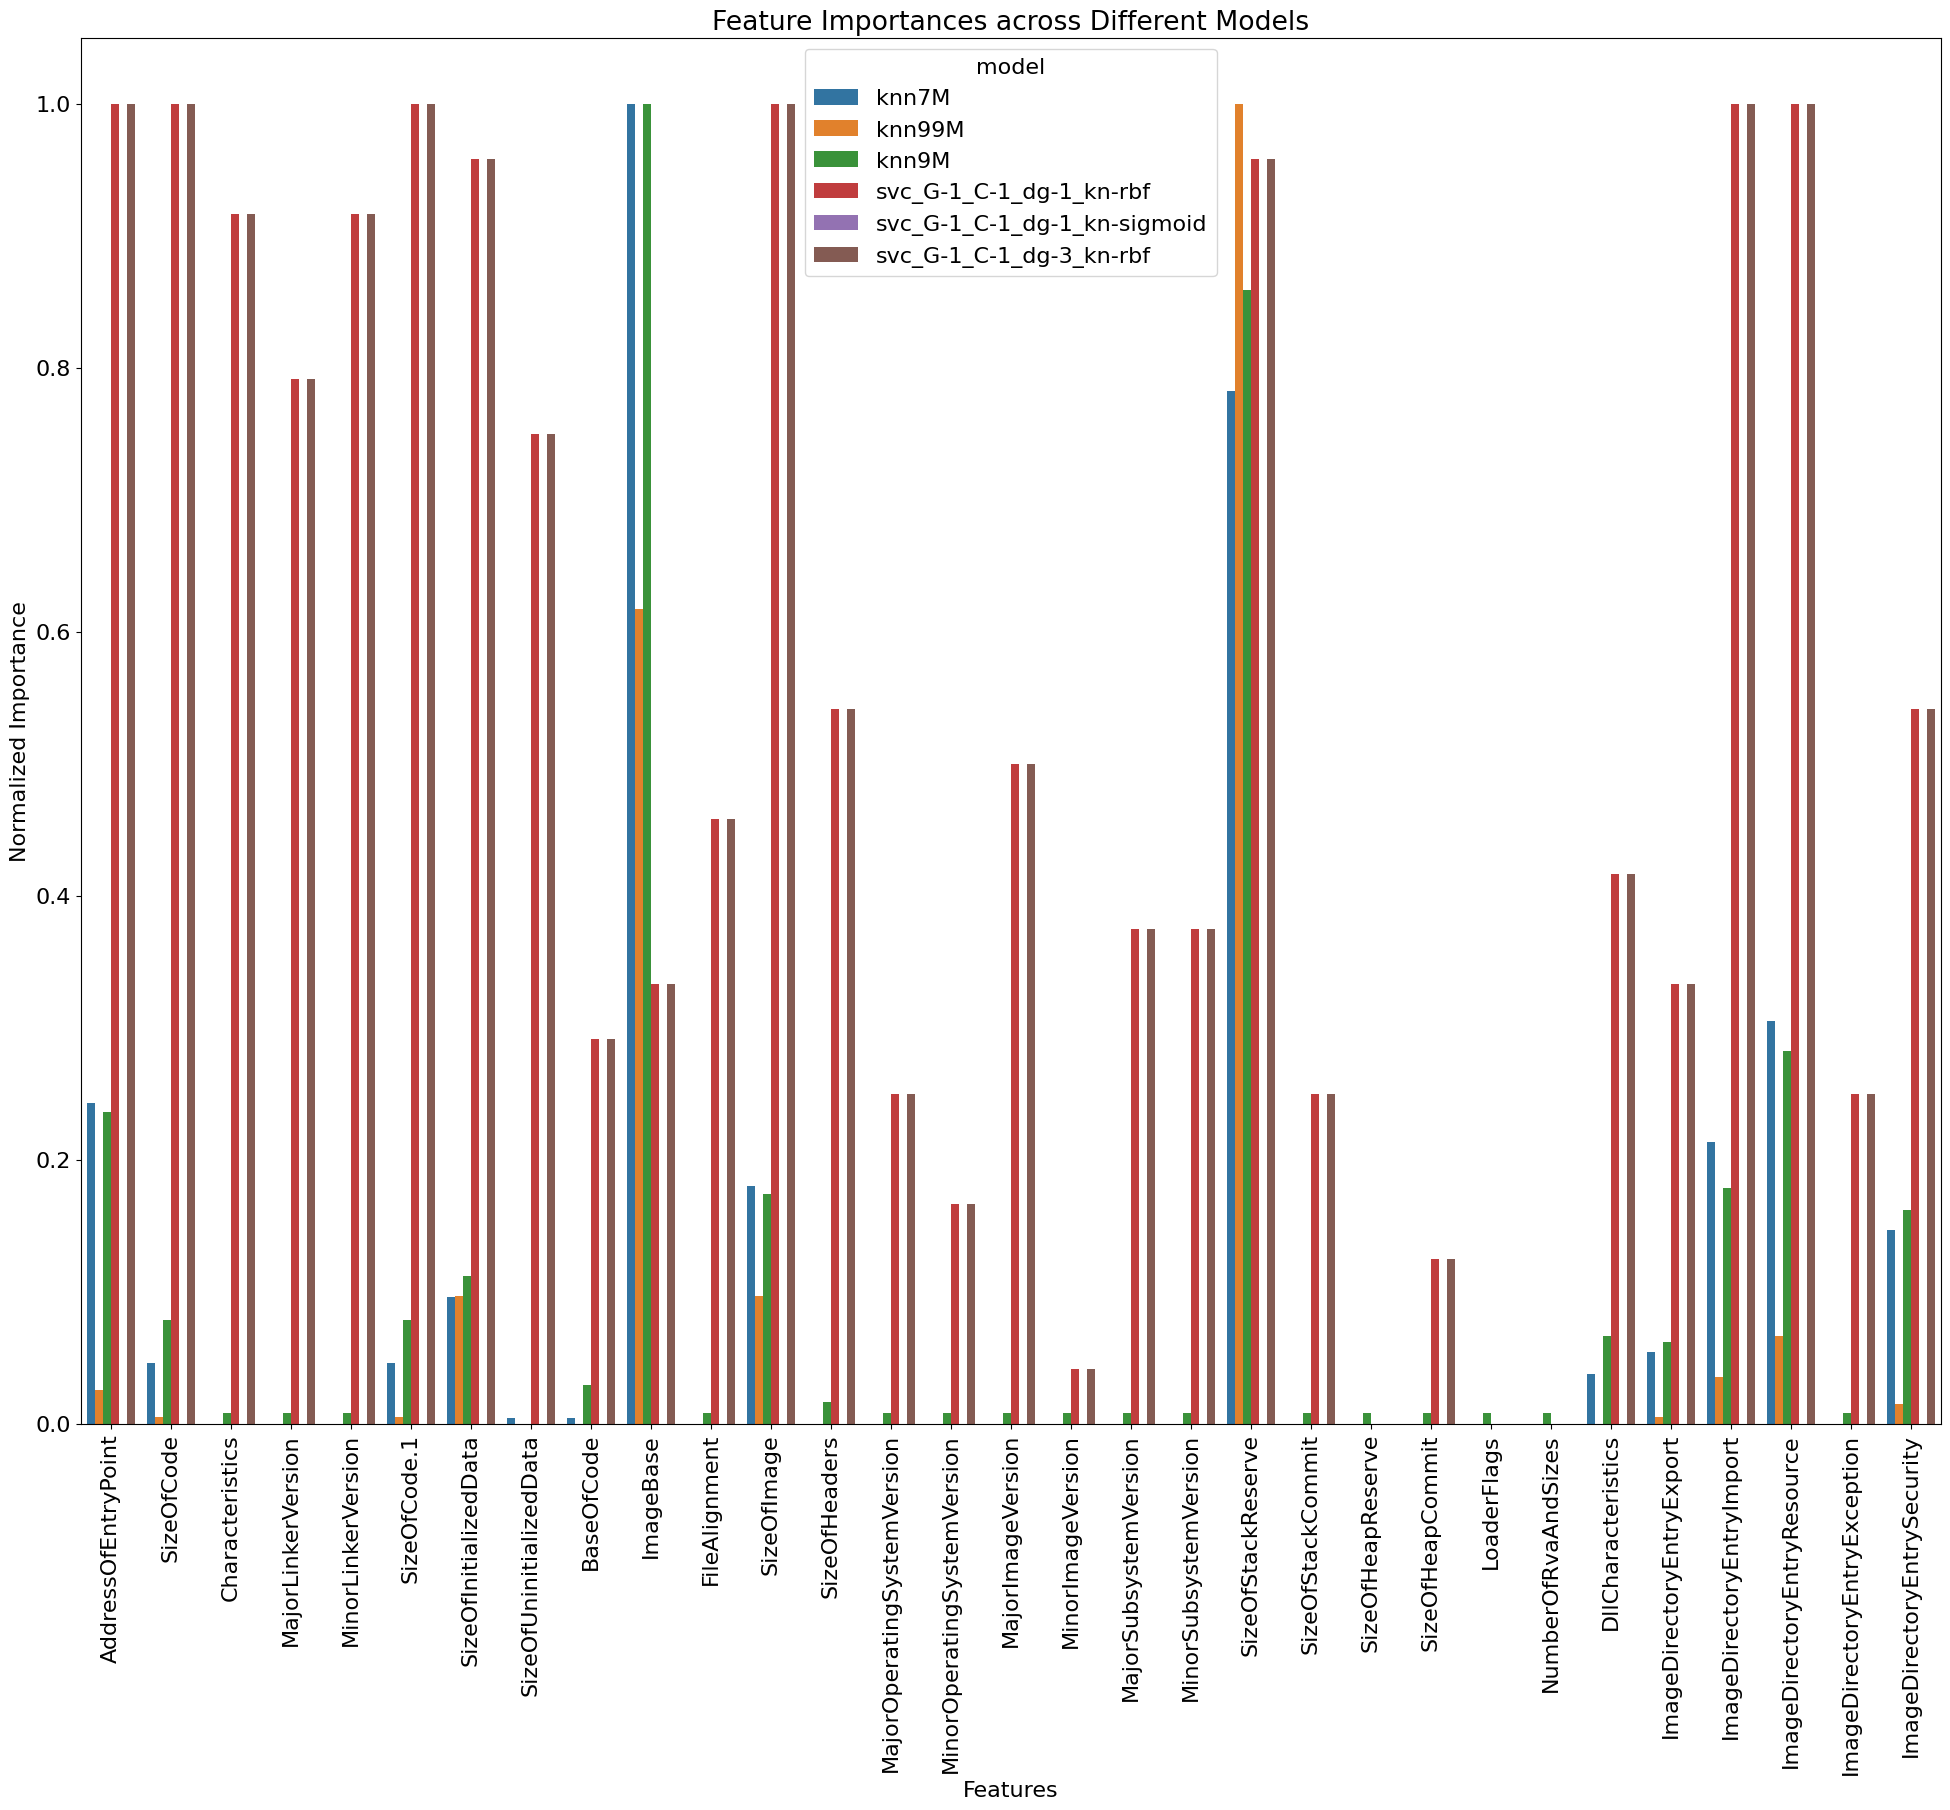

<Figure size 640x480 with 0 Axes>

In [196]:
importances_perm['normalized_perm'] = importances_perm.groupby('model')['importance'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.rc("font", size=16)

plt.figure(figsize=(24, 18))
sns.barplot(data=importances_perm, x='feature', y='normalized_perm', hue='model')
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.xticks(rotation=90, fontsize=16)
plt.title('Feature Importances across Different Models')
plt.show()
plt.tight_layout()